## Scaling estimates figure

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import scipy.stats
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [3]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonGridNoC='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

# Grid variables
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
time = CanyonStateOut.variables['T']

In [4]:
# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 8300 # mid-length width
Hh=97.5 # head depth
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,W=8300,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*W))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)



In [5]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [8]:
# records2 has all the runs without the ones where K_bg changes. I don't want to use this ones for fitting the data
ind = [0,3,4,5,6,7,8,9,10,11,12,13,14,#15,16,17,18,19,20,22
       15]
records2 = []
for ii in ind:
    records2.append(records[ii])


In [9]:
# records3 has all the runs without the ones where K_bg changes and run with low U high N.
ind = [0,3,4,5,6,7,8,9,10,11,12,13,14,#15,16,17,18,20,22
       15]
records3 = []
for ii in ind:
    records3.append(records[ii])


In [10]:
select_rec = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,#15,16,17,18,19,20,21,22
              15]

for ind in select_rec:
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    
    
    #file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))
    #         +'advTracer_CS_transports.nc')
    #fileNoC = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))
    #            +'advTracer_CS_transports.nc')
    #filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))
    #         +'difTracer_CS_transports.nc')
    #fileNoCdif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))
    #            +'difTracer_CS_transports.nc')
    
    #file2 = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))
    #         +'water_CS_transports.nc')
    #fileNoC2 = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))
    #            +'water_CS_transports.nc')
    
    
    print(fileNoC)
    
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
   
    #dfcan = xr.open_dataset(file)
    #dfnoc = xr.open_dataset(fileNoC)
    #dfcandif = xr.open_dataset(filedif)
    #dfnocdif = xr.open_dataset(fileNoCdif)
   
   
    #dfcan2 = xr.open_dataset(file2)
    #dfnoc2 = xr.open_dataset(fileNoC2)
   
    records[ind].HCW = dfcan['HCW']
    recordsNoC[ind].HCW = dfnoc['HCW']
    
    records[ind].HCWTr1 = dfcan['HCWTr1']
    recordsNoC[ind].HCWTr1 = dfnoc['HCWTr1']
    
    #records[ind].HCW = dfcan2.Vert_water_trans_sb
    #recordsNoC[ind].HCW = dfnoc2.Vert_water_trans_sb
    
    records[ind].TrMass = dfcan['TrMassHCW']
    recordsNoC[ind].TrMass = dfnoc['TrMassHCW']
    records[ind].TrMassTr1 = dfcan['TrMassHCWTr1']
    recordsNoC[ind].TrMassTr1 = dfnoc['TrMassHCWTr1']
    records[ind].TrMassTr2 = dfcan['TrMassHCWTr2']
    recordsNoC[ind].TrMassTr2 = dfnoc['TrMassHCWTr2']

    records[ind].TrMassTot = dfcan['TotTrMass']
    recordsNoC[ind].TrMassTot = dfnoc['TotTrMass']
    records[ind].TrMassTotTr2 = dfcan['TotTrMassTr2']
    recordsNoC[ind].TrMassTotTr2 = dfnoc['TotTrMassTr2']
    records[ind].TrMassTotTr1 = dfcan['TotTrMassTr1']
    recordsNoC[ind].TrMassTotTr1 = dfnoc['TotTrMassTr1']

    #records[ind].TrMass = dfcan.Vert_adv_trans_sb + dfcandif.Vert_dif_trans_sb
    #recordsNoC[ind].TrMass = dfnoc.Vert_adv_trans_sb + dfnocdif.Vert_dif_trans_sb


/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun42.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun41.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun40.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun48.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun74.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun76.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun68.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun53.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun70.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun72.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun50.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun50.csv
/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun42.csv

In [11]:
# Save mean maximum N of days 3-6 and std for each run.

keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (record.name,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])   # 22:26 for other scaling
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    record.maxN = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    record.stdN = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
  
    maxd3a = max(df_anom[keys[0]][22:26])   # 22:26 for other scaling
    maxd4a = max(df_anom[keys[1]][22:26])   
    maxd5a = max(df_anom[keys[2]][22:26])   
    maxd6a = max(df_anom[keys[3]][22:26])   
    
    record.maxNabove = np.mean(np.array([maxd3a,maxd4a,maxd5a,maxd6a]))
    record.stdNabove = np.std(np.array([maxd3a,maxd4a,maxd5a,maxd6a]))
  

In [12]:
# Save mean maximum N of days 3-6 and std for each run.

keys = ['dTrdz_tt06','dTrdz_tt08','dTrdz_tt10','dTrdz_tt12']
key0 = 'dTrdz_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s.csv' %
                 (record.name,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
        
    maxd3 = min(df_anom[keys[0]][22:26])   
    maxd4 = min(df_anom[keys[1]][22:26])   
    maxd5 = min(df_anom[keys[2]][22:26])   
    maxd6 = min(df_anom[keys[3]][22:26])   
    
 
    record.maxdTrdz = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    record.stddTrdz = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    record.inidTrdz = df[key0][30]
    

In [13]:
keys = ['Tr_profile_tt08','Tr_profile_tt10','Tr_profile_tt12','Tr_profile_tt14','Tr_profile_tt16']
key0 = 'Tr_profile_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' %
                 (record.name,stname))
    df = pd.read_csv(filename1)
        
    maxd4 = np.mean(df[keys[0]][25:32])   
    maxd5 = np.mean(df[keys[1]][25:32])   
    maxd6 = np.mean(df[keys[2]][25:32]) 
    maxd7 = np.mean(df[keys[3]][25:32])  
    maxd8 = np.mean(df[keys[4]][25:32])  
    
     
    maxd0 = df[key0][29] 
    
    
    record.maxTr = np.mean(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    record.stdTr = np.std(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    
    
    record.TrSB = maxd0
    
    
   

The rms error for N/No above is 0.006836
The rms error for N/No below is 0.017214
The rms error for dTr/dz above is 0.127457
The rms error for C/Co is 0.000866
The rms error for Phi is 27914233.674489
The rms error for PhiTr/1E5 above is 0.124614


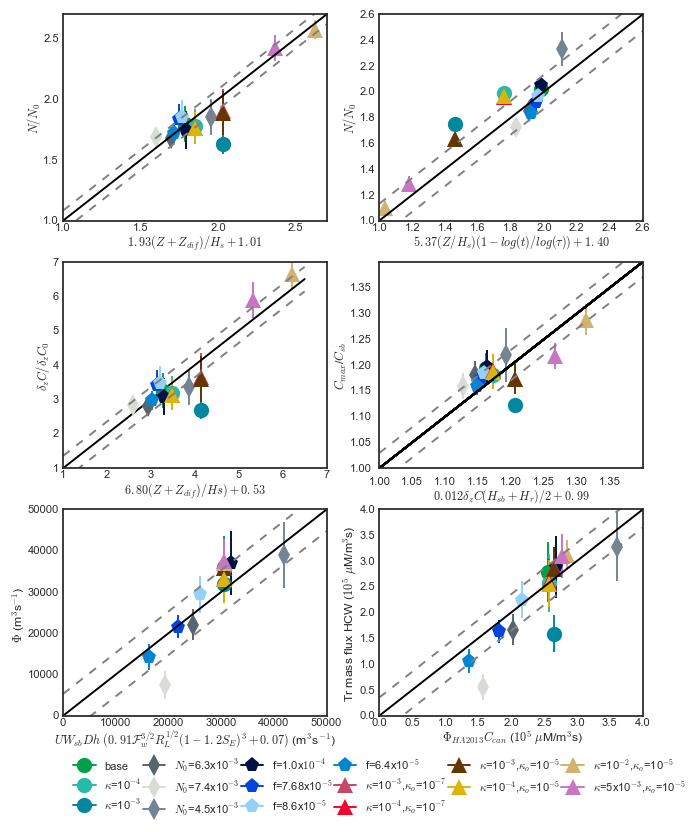

In [14]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,9.05)) # 190mm = 7.48 in, 230cm = 9.05in

gs = gspec.GridSpec(3, 2)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])
ax4 = plt.subplot(gs[2,0])
ax5 = plt.subplot(gs[2,1])

t=5 # days

# No

# dTr/dz
# ax.legend(bbox_to_anchor=(1.3,1)

# Tr
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No above %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*rec.kv) 
    
    
    plt1 = ax0.errorbar((1.93*((Z+Zdif)/Hs))+1.01,rec.maxNabove/rec.N,
                        yerr = rec.stdNabove/rec.N, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    
    rec.Z = Z
    rec.Zdif = Zdif
    
    ax0.set_ylabel('$N/N_0$',labelpad=0.5)
    ax0.set_xlabel(r'$1.93(Z+Z_{dif})/H_s+1.01$',labelpad=0.5)

maxN_array_Kv = np.array([rec.maxNabove/rec.N for rec in records2])
tilt_array_Kv = np.array([(rec.Z+rec.Zdif)/Hs for rec in records2])
x_fit = np.linspace(1.0, 2.7, 50)

mean_sq_err = np.mean(((maxN_array_Kv)-(1.93*tilt_array_Kv+1.01))**2)
upper_bound = ax0.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax0.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for N/No above is %f' %mean_sq_err)

ax0.plot(np.linspace(1.0, 2.7, 50),np.linspace(1.0, 2.7, 50),'k-')
ax0.set_ylim(1,2.7)
ax0.set_xlim(1,2.7)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    plt1 = ax1.errorbar((5.37*(Z/Hs)*(TauNo))+1.40,rec.maxN/rec.N,
                        yerr = rec.stdN/rec.N, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    
    rec.Z = Z
    rec.tauNo = TauNo
    
    ax1.set_ylabel('$N/N_0$',labelpad=0.5)
    ax1.set_xlabel(r'$5.37(Z/H_s)(1-log(t)/log(\tau))+1.40$',labelpad=0.5)

maxN_array = np.array([rec.maxN/rec.N for rec in records2])
tilt_array = np.array([(rec.Z/Hs)*rec.tauNo for rec in records2])
x_fit = np.linspace(1, 2.6, 50)

mean_sq_err = np.mean((maxN_array-(5.37*tilt_array+1.40))**2)

upper_bound = ax1.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax1.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for N/No below is %f' %mean_sq_err)

ax1.plot(np.linspace(1, 2.6, 50),np.linspace(1, 2.6, 50),'k-')
ax1.set_ylim(1,2.6)
ax1.set_xlim(1,2.6)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% dTr/dz %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax2.plot(np.linspace(1,6.5, 50),np.linspace(1,6.5, 50),'k-')

for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*rec.kv)
    plt1 = ax2.errorbar(6.80*((Z+Zdif)/Hs)+0.53,rec.maxdTrdz/rec.inidTrdz,
                        yerr = rec.stddTrdz/rec.inidTrdz, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
   
    rec.Z = Z
    rec.Zdif = Zdif
    ax2.set_ylabel('$\delta_zC/\delta_zC_0$',labelpad=0.5)
    ax2.set_xlabel(r'$6.80(Z+Z_{dif})/Hs)+0.53$',labelpad=0.5)

maxN_array = np.array([rec.maxdTrdz/rec.inidTrdz for rec in records2])
tilt_array = np.array([(rec.Z+rec.Zdif)/Hs for rec in records2])
x_fit = np.linspace(1,6.5, 50)

mean_sq_err = np.mean(((maxN_array)-(6.80*tilt_array+0.53))**2)
upper_bound = ax2.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax2.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for dTr/dz above is %f' %mean_sq_err)
ax2.set_ylim(1,7)
ax2.set_xlim(1,7)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Tracer Conc %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec in records:
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    ax3.plot(np.linspace(1,1.4,50),np.linspace(1,1.4,50),'k-')
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    plt1 = ax3.errorbar((0.09*(dTrdz*(Hh+132.0)/2.0)+7.17)/rec.TrSB,rec.maxTr/rec.TrSB,
                        yerr = rec.stdTr/rec.TrSB,
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    rec.Z = Z
    rec.Zdif = Zdif
    rec.dTr = dTrdz
    ax3.set_xlim(1,1.4)
    ax3.set_ylim(1,1.4)
    #ax3.set_title('Max tracer concetration between head nad sh, Dn')
    ax3.set_ylabel('$C_{max}$/$C_{sb}$',labelpad=0.5)
    ax3.set_xlabel(r'$0.012\delta_zC(H_{sb}+H_r)/2+0.99$',labelpad=0.5)

maxN_array = np.array([rec.maxTr/rec.TrSB for rec in records2])
tilt_array = np.array([(0.09*(rec.dTr*(Hh+132.0)/2.0)+7.17)/rec.TrSB for rec in records2])
x_fit = np.linspace(1,1.4, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax3.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax3.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for C/Co is %f' %mean_sq_err)

ax3.set_ylim(1,1.4)
ax3.set_xlim(1,1.4)


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec,recNoC in zip(records,recordsNoC):
    

    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    Napprox = rec.N*((5.38*(Z/Hs)*(TauNo))+1.41)
     
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    
    HA2013=((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    can_eff = rec.HCW-recNoC.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    #Phi = np.mean(np.array([(can_eff[ii]) for ii in range (8,14)]))
      
    plt1 = ax4.errorbar(HA2013*(rec.u*W*Dh(rec.f,L,rec.N)),Phi,
                        yerr=Phi_std,
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    rec.Phi = Phi
    rec.HA2013 = HA2013*(rec.u*W*Dh(rec.f,L,rec.N))

#ax4.set_title('Upwelling flux scaled as HA2013 using Napprox')
ax4.set_ylabel('$\Phi$ (m$^3$s$^{-1}$)  ',labelpad=0.5)
ax4.set_xlabel('$UW_{sb}Dh$ $(0.91\mathcal{F}_w^{3/2}R_L^{1/2}(1-1.2S_E)^3+0.07)$ (m$^3$s$^{-1}$)',labelpad=0.5)
    
maxN_array = np.array([rec.Phi for rec in records3])
tilt_array = np.array([rec.HA2013 for rec in records3])
x_fit = np.linspace(0,50000, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax4.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax4.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for Phi is %f' %mean_sq_err)

ax4.plot(np.linspace(0,50000, 50),np.linspace(0,50000, 50),'k-')
ax4.set_ylim(0,50000)
    
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec,recNoC in zip(records,recordsNoC):    
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*rec.kv)
    Napprox=((1.91*((Z+Zdif)/Hs))+0.99)*rec.N
    
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    
    Capprox=0.09*(dTrdz*(Hh+132.0)/2.0)+7.17
    
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=(rec.u*W*Dh(rec.f,L,rec.N))*((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    mass_can_eff = rec.TrMass-recNoC.TrMass
    can_eff = rec.HCW-recNoC.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    phiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    plt1 = ax5.errorbar(HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                        (phiTr)/1E5,
                        yerr = phiTr_std/1E5,
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    rec.PhiTr = (phiTr)/1E5
    rec.PhiTrScale = HA2013*(Capprox)/1E5
     
ax5.set_xlabel(' $\Phi_{HA2013} C_{can}$ ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
ax5.set_ylabel('Tr mass flux HCW ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)

maxN_array = np.array([rec.PhiTr for rec in records3])
tilt_array = np.array([rec.PhiTrScale for rec in records3])
x_fit = np.linspace(0,4, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax5.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax5.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for PhiTr/1E5 above is %f' %mean_sq_err)

ax5.set_ylim(0,4)
ax5.plot(np.linspace(0,4, 50),np.linspace(0,4, 50),'k-')

    
ax5.legend(bbox_to_anchor=(1.2,-0.15),ncol=6, columnspacing=0.1)
    
ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)
ax5.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)
ax5.tick_params(axis='y', pad=3)

plt.savefig('fig_scaling_estimates.eps',format='eps',bbox_inches='tight')


In [33]:
print ("\t".join(['Exp name&','Phi 1E4&','PhiTr 1E5&', 'Total HCW $10^{10}$ m$^3$&', 
                  'CanyonHCW&',  'TotTrMassHCW $10^{11}$ $\mu$Mm$^3$&', 'CanyonTrMassHCW&',
                  'TotalTrMass $10^{11}$ $\mu$Mm$^3$&', 'CanyonTrMass ' ]))

    
for rec,recNoC in zip(records,recordsNoC):
    
    can_eff = rec.HCW-recNoC.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    mass_can_eff = rec.TrMass-recNoC.TrMass
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    phiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
                   
    print ("\t".join(['%s\t&%0.2f$\pm$%0.2f\t&%0.2f$\pm$%0.2f\t&%.3f\t&%.3f\t\t&%.3f\t\t&%.3f\t&%.3f\t\t&%.3f\t ' 
                      % (rec.name,
                         Phi/1E4,Phi_std/1E4,
                         phiTr/1E5, phiTr_std/1E5,
                         rec.HCW[18]/1E10,
                         (rec.HCW[18]-recNoC.HCW[18])/rec.HCW[18],
                         (rec.TrMass[18])/1E11,
                         (((rec.TrMass[18])-
                           (recNoC.TrMass[18]))/(rec.TrMass[18])),
                         (rec.TrMassTot[18])/1E11,
                         (((rec.TrMassTot[18]-recNoC.TrMassTot[18]))/(rec.TrMassTot[18])))
                     ]))
                                                              
       

Exp name&	Phi 1E4&	PhiTr 1E5&	Total HCW $10^{10}$ m$^3$&	CanyonHCW&	TotTrMassHCW $10^{11}$ $\mu$Mm$^3$&	CanyonTrMassHCW&	TotalTrMass $10^{11}$ $\mu$Mm$^3$&	CanyonTrMass 
CNTDIFF_run38	&3.60$\pm$0.75	&2.79$\pm$0.58	&2.023	&0.962		&1.605		&0.964	&9.852		&0.033	 
CNTDIFF_run37	&3.56$\pm$0.69	&2.58$\pm$0.56	&2.028	&0.955		&1.517		&0.955	&9.869		&0.034	 
CNTDIFF_run36	&3.19$\pm$0.34	&1.59$\pm$0.35	&2.201	&0.880		&1.258		&0.856	&10.015		&0.038	 
CNTDIFF_run45	&2.21$\pm$0.38	&1.67$\pm$0.30	&1.515	&0.967		&1.166		&0.968	&9.664		&0.021	 
CNTDIFF_run73	&0.75$\pm$0.33	&0.56$\pm$0.25	&0.758	&0.947		&0.575		&0.948	&9.487		&0.012	 
CNTDIFF_run75	&3.90$\pm$0.80	&3.28$\pm$0.67	&2.830	&0.746		&2.369		&0.774	&10.200		&0.055	 
CNTDIFF_run67	&3.70$\pm$0.78	&2.88$\pm$0.60	&2.075	&0.955		&1.655		&0.958	&9.862		&0.034	 
CNTDIFF_run51	&2.16$\pm$0.28	&1.64$\pm$0.23	&1.612	&0.951		&1.247		&0.952	&9.795		&0.024	 
CNTDIFF_run69	&2.95$\pm$0.45	&2.24$\pm$0.36	&1.826	&0.959		&1.428		&0.961	&9.821		&0.028	 
CNTDIFF_r

In [51]:
print ("\t".join(['Exp Name &','$\kappa_{bg}$&','$\kappa_{can}$&', '$N$ (s$^{-1}$)$&', 
                  '$f$ (s$^{-1}$)&',  '$Bu$&', 'U (ms$^{-1}$)&',
                 ]))

    
for rec,recNoC in zip(records,recordsNoC):
     print ("\t".join(['%s\t&%0.2e\t&%0.2e\t&%.2e\t&%.3e\t\t&%.3e\t\t&%.3f\t ' 
                      % (rec.name,
                         rec.kv,
                         rec.kv, 
                         rec.N,
                         rec.f,
                         Bu(rec.N, rec.f,Wsb,Hs),
                         rec.u
                         )
                       ]))
                                                              
       

Exp Name &	$\kappa_{bg}$&	$\kappa_{can}$&	$N$ (s$^{-1}$)$&	$f$ (s$^{-1}$)&	$Bu$&	U (ms$^{-1}$)&
CNTDIFF_run38	&1.00e-05	&1.00e-05	&5.50e-03	&9.660e-05		&6.460e-01		&0.358	 
CNTDIFF_run37	&1.00e-04	&1.00e-04	&5.50e-03	&9.660e-05		&6.460e-01		&0.358	 
CNTDIFF_run36	&1.00e-03	&1.00e-03	&5.50e-03	&9.660e-05		&6.460e-01		&0.358	 
CNTDIFF_run45	&1.00e-05	&1.00e-05	&6.30e-03	&9.660e-05		&7.400e-01		&0.358	 
CNTDIFF_run73	&1.00e-05	&1.00e-05	&7.40e-03	&9.660e-05		&8.692e-01		&0.358	 
CNTDIFF_run75	&1.00e-05	&1.00e-05	&4.50e-03	&9.660e-05		&5.285e-01		&0.358	 
CNTDIFF_run67	&1.00e-05	&1.00e-05	&5.50e-03	&1.000e-04		&6.240e-01		&0.358	 
CNTDIFF_run51	&1.00e-05	&1.00e-05	&5.50e-03	&7.680e-05		&8.126e-01		&0.358	 
CNTDIFF_run69	&1.00e-05	&1.00e-05	&5.50e-03	&8.600e-05		&7.256e-01		&0.358	 
CNTDIFF_run71	&1.00e-05	&1.00e-05	&5.50e-03	&6.400e-05		&9.751e-01		&0.358	 
3DVISC_run01	&1.00e-03	&1.00e-03	&5.50e-03	&9.660e-05		&6.460e-01		&0.358	 
3DVISC_run02	&1.00e-04	&1.00e-04	&5.50e-03	&9.660e-05		&6.

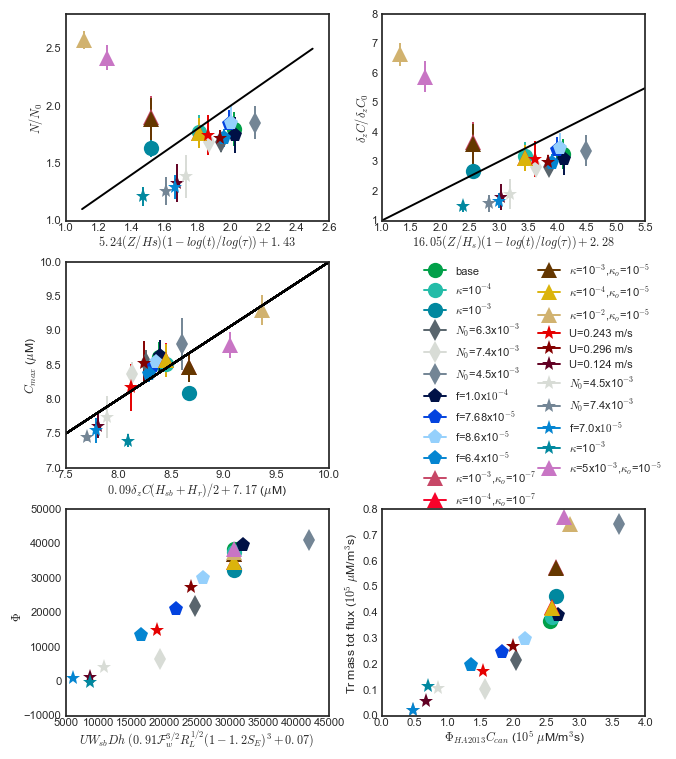

In [14]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,9.05)) # 190mm = 7.48 in, 230cm = 9.05in

gs = gspec.GridSpec(3, 2)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[2,0])
ax5 = plt.subplot(gs[2,1])

t=4 # days

# No

# dTr/dz
# ax.legend(bbox_to_anchor=(1.3,1)

# Tr
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    #TauNo = 1-(0.7*t*24*3600*rec.kv/(((Hs-Hh)/2)**2))
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    #plt1 = ax0.errorbar((2.6*(Z/Hs)*(TauNo))+1.02,rec.maxN/rec.N,
    #                   yerr = rec.stdN/rec.N, # since rec.N is a constant
    #                   marker = rec.mstyle,
    #                   markersize = 11,
    #                   color = sns.xkcd_rgb[rec.color],
    #                   label=rec.label)
    plt1 = ax0.errorbar((5.24*(Z/Hs)*(TauNo))+1.43,rec.maxN/rec.N,
                       yerr = rec.stdN/rec.N, # since rec.N is a constant
                       marker = rec.mstyle,
                       markersize = 11,
                       color = sns.xkcd_rgb[rec.color],
                       label=rec.label)
    
    
    
    rec.tauNo = TauNo 
    rec.Z = Z
    
    ax0.set_ylabel('$N/N_0$',labelpad=0.5)
    #ax0.set_xlabel(r'$2.6(Z/Hs)(1-0.7t/\tau)+1.02$',labelpad=0.5)
    ax0.set_xlabel(r'$5.24(Z/Hs)(1-log(t)/log(\tau))+1.43$',labelpad=0.5)

ax0.plot(np.linspace(1.1, 2.5, 50),np.linspace(1.1, 2.5, 50),'k-')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% dTr/dz %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    plt1 = ax1.errorbar((16.05*((Z/Hs)*(TauNo)))+2.28,rec.maxdTrdz/rec.inidTrdz,
                       yerr = rec.stddTrdz/rec.inidTrdz, # since rec.N is a constant
                       marker = rec.mstyle,
                       markersize = 11,
                       color = sns.xkcd_rgb[rec.color],
                       label=rec.label)
   
    #ax1.set_title('Max $\delta_zC$ below Head depth Dn' )
    ax1.set_ylabel('$\delta_zC/\delta_zC_0$',labelpad=0.5)
    ax1.set_xlabel(r'$16.05(Z/H_s)(1-log(t)/log(\tau))+2.28$',labelpad=0.5)

ax1.plot(np.linspace(1,5.5, 50),np.linspace(1,5.5, 50),'k-')


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Tracer Conc %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec in records:
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    #TauNo = 1-(0.45*t*24*3600*rec.kv/((((Hs-Hh)/2)**2)))
    ax2.plot(np.linspace(7.5,10.0,50),np.linspace(7.5,10,50),'k-')
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    plt1 = ax2.errorbar(0.09*(dTrdz*(Hh+132.0)/2.0)+7.17,rec.maxTr,
                   yerr = rec.stdTr,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)
   
    #ax2.set_title('Max tracer concetration between head nad sh, Dn')
    ax2.set_ylabel('$C_{max}$ ($\mu$M)',labelpad=0.5)
    ax2.set_xlabel(r'$0.09\delta_zC(H_{sb}+H_r)/2+7.17$ ($\mu$M)',labelpad=0.5)


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec,recNoC in zip(records,recordsNoC):
    

    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    Napprox=((5.24*(Z/Hs)*(TauNo))+1.43)*rec.N
     
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    can_eff = rec.HCW-recNoC.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
    #Phi = np.mean(np.array([(can_eff[ii]) for ii in range (8,14)]))
      
    plt1 = ax4.plot(HA2013*(rec.u*W*Dh(rec.f,L,rec.N)),
                    Phi,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)


    #ax4.set_title('Upwelling flux scaled as HA2013 using Napprox')
    ax4.set_ylabel('$\Phi$   ',labelpad=0.5)
    ax4.set_xlabel('$UW_{sb}Dh$ $(0.91\mathcal{F}_w^{3/2}R_L^{1/2}(1-1.2S_E)^3+0.07)$ ',labelpad=0.5)

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec,recNoC in zip(records,recordsNoC):    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    #TauN = 1-((0.7*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauC = 1-((0.45*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauN = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    Napprox=((4.84*(Z/Hs)*(TauN))+1.49)*rec.N
    
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    Capprox=0.09*(dTrdz*(Hh+132.0)/2.0)+7.17
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=(rec.u*W*Dh(rec.f,L,rec.N))*((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    mass_can_eff = rec.TrMassTot-recNoC.TrMassTot
    can_eff = rec.HCW-recNoC.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
    #phiTr = np.mean(np.array([(mass_can_eff[ii]) for ii in range (8,14)]))
    
    #ax5.plot(np.linspace(0.5E8,3.0E8,50),np.linspace(0.5E8,3.0E8,50),'k-')
    plt1 = ax5.plot(HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                    (phiTr)/1E5,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)
     
    #plt1 = ax5.plot(1000*phi*rec.maxTr, # 1000 is a conversion factor
    #                phiTr,
    #                marker = rec.mstyle,
    #                markersize = 11,
    #                color = sns.xkcd_rgb[rec.color],
    #                label=rec.label)

    #ax5.set_title('Tracer Mass upwelled scaled as $C \Phi_{HA2013}$, using N approx')
    ax5.set_xlabel(' $\Phi_{HA2013} C_{can}$ ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
    ax5.set_ylabel('Tr mass tot flux ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)

    
ax5.legend(bbox_to_anchor=(1.1,2.25),ncol=2, columnspacing=0.1)
    
ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)
ax5.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)
ax5.tick_params(axis='y', pad=3)

#plt.savefig('fig_scaling_estimates.eps',format='eps',bbox_inches='tight')


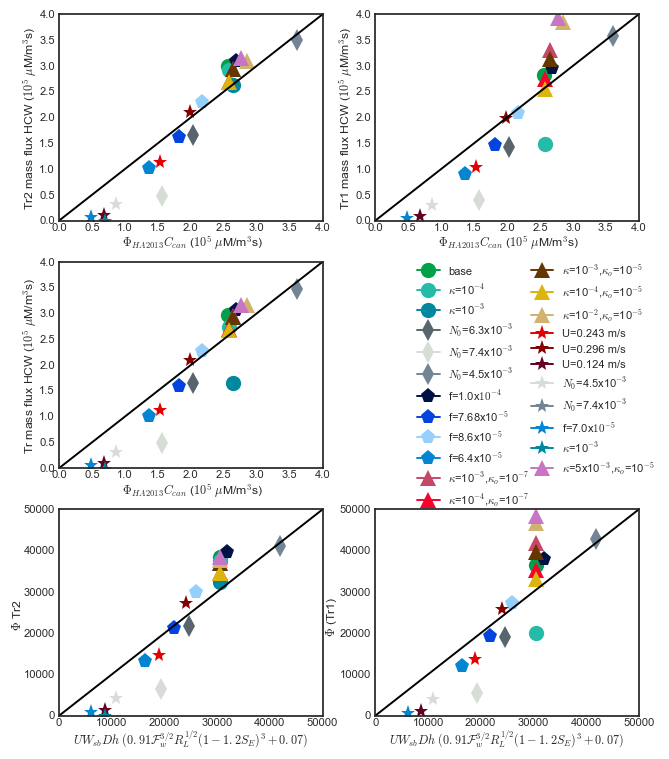

In [15]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,9.05)) # 190mm = 7.48 in, 230cm = 9.05in

gs = gspec.GridSpec(3, 2)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[2,0])
ax5 = plt.subplot(gs[2,1])

t=4 # days

# No

# dTr/dz
# ax.legend(bbox_to_anchor=(1.3,1)

# Tr
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec,recNoC in zip(records,recordsNoC):    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
   
    TauC = 1-((0.45*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauN = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    Napprox=((4.84*(Z/Hs)*(TauN))+1.49)*rec.N
    
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    Capprox=0.09*(dTrdz*(Hh+132.0)/2.0)+7.17
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=(rec.u*W*Dh(rec.f,L,rec.N))*((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    mass_can_eff = rec.TrMassTr2-recNoC.TrMassTr2
    can_eff = rec.HCW-recNoC.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
   
    plt1 = ax0.plot(HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                    (phiTr)/1E5,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)
     
    ax0.set_xlabel(' $\Phi_{HA2013} C_{can}$ ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
    ax0.set_ylabel('Tr2 mass flux HCW ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
    ax0.set_ylim(0,4)
ax0.plot(np.linspace(0,4, 50),np.linspace(0,4, 50),'k-')

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec,recNoC in zip(records,recordsNoC):    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    #TauN = 1-((0.7*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauC = 1-((0.45*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauN = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    Napprox=((4.84*(Z/Hs)*(TauN))+1.49)*rec.N
    
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    Capprox=0.09*(dTrdz*(Hh+132.0)/2.0)+7.17
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=(rec.u*W*Dh(rec.f,L,rec.N))*((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    mass_can_eff = rec.TrMassTr1-recNoC.TrMassTr1
    can_eff = rec.HCW-recNoC.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
    plt1 = ax1.plot(HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                    (phiTr)/1E5,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)
     
    ax1.set_xlabel(' $\Phi_{HA2013} C_{can}$ ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
    ax1.set_ylabel('Tr1 mass flux HCW ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
    ax1.set_ylim(0,4)

ax1.plot(np.linspace(0,4, 50),np.linspace(0,4, 50),'k-')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec,recNoC in zip(records,recordsNoC):
    

    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    Napprox=((5.24*(Z/Hs)*(TauNo))+1.43)*rec.N
     
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    can_eff = rec.HCWTr1-recNoC.HCWTr1
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
    #Phi = np.mean(np.array([(can_eff[ii]) for ii in range (8,14)]))
      
    plt1 = ax5.plot(HA2013*(rec.u*W*Dh(rec.f,L,rec.N)),
                    Phi,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)


    
    ax5.set_ylabel('$\Phi$ (Tr1)   ',labelpad=0.5)
    ax5.set_xlabel('$UW_{sb}Dh$ $(0.91\mathcal{F}_w^{3/2}R_L^{1/2}(1-1.2S_E)^3+0.07)$ ',labelpad=0.5)
    ax5.set_ylim(0,50000)

ax5.plot(np.linspace(0,50000, 50),np.linspace(0,50000, 50),'k-')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec,recNoC in zip(records,recordsNoC):
    

    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    Napprox=((5.24*(Z/Hs)*(TauNo))+1.43)*rec.N
     
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    can_eff = rec.HCW-recNoC.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
    #Phi = np.mean(np.array([(can_eff[ii]) for ii in range (8,14)]))
      
    plt1 = ax4.plot(HA2013*(rec.u*W*Dh(rec.f,L,rec.N)),
                    Phi,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)


    #ax4.set_title('Upwelling flux scaled as HA2013 using Napprox')
    ax4.set_ylabel('$\Phi$ Tr2  ',labelpad=0.5)
    ax4.set_xlabel('$UW_{sb}Dh$ $(0.91\mathcal{F}_w^{3/2}R_L^{1/2}(1-1.2S_E)^3+0.07)$ ',labelpad=0.5)
    ax4.set_ylim(0,50000)
ax4.plot(np.linspace(0,50000, 50),np.linspace(0,50000, 50),'k-')

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec,recNoC in zip(records,recordsNoC):    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    #TauN = 1-((0.7*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauC = 1-((0.45*t*24*3600*rec.kv)/(((Hs-Hh)/2)**2))
    TauN = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    Napprox=((4.84*(Z/Hs)*(TauN))+1.49)*rec.N
    
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    Capprox=0.09*(dTrdz*(Hh+132.0)/2.0)+7.17
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=(rec.u*W*Dh(rec.f,L,rec.N))*((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    mass_can_eff = rec.TrMass-recNoC.TrMass
    can_eff = rec.HCW-recNoC.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,14)]))
    
    plt1 = ax2.plot(HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                    (phiTr)/1E5,
                    marker = rec.mstyle,
                    markersize = 11,
                    color = sns.xkcd_rgb[rec.color],
                    label=rec.label)
     
    ax2.set_xlabel(' $\Phi_{HA2013} C_{can}$ ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
    ax2.set_ylabel('Tr mass flux HCW ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)

    ax2.set_ylim(0,4)
ax2.plot(np.linspace(0,4, 50),np.linspace(0,4, 50),'k-')

    
ax5.legend(bbox_to_anchor=(1.1,2.25),ncol=2, columnspacing=0.1)
    
ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)
ax5.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)
ax5.tick_params(axis='y', pad=3)

#plt.savefig('fig_scaling_estimates.eps',format='eps',bbox_inches='tight')


## Individual plots for talks

The rms error for N/No above is 0.006836
The rms error for N/No below is 0.017214
The rms error for dTr/dz above is 0.127457
The rms error for C/Co is 0.000866
The rms error for Phi is 27914233.674489
The rms error for PhiTr/1E5 above is 0.124614


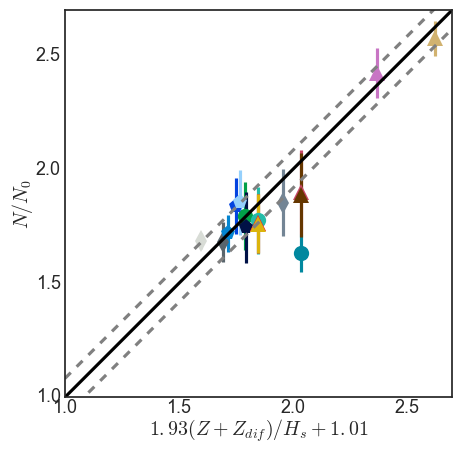

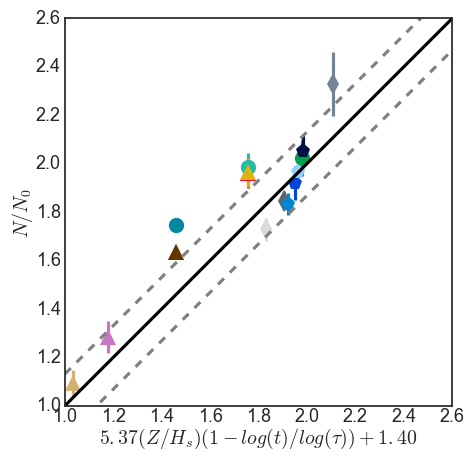

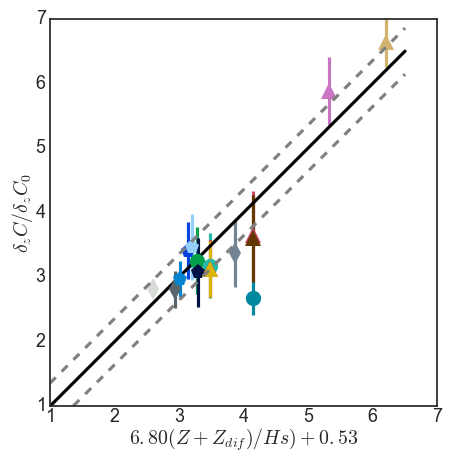

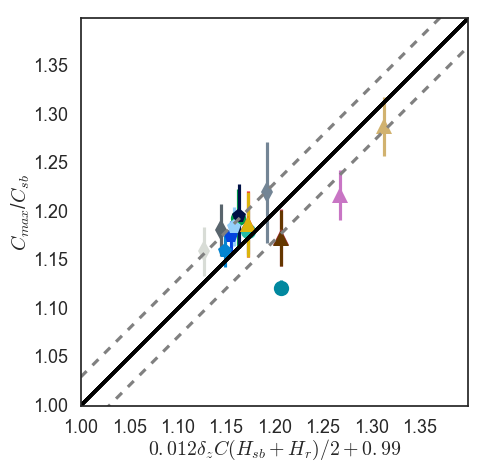

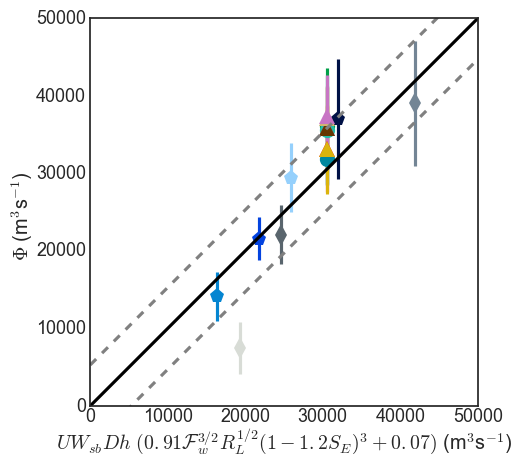

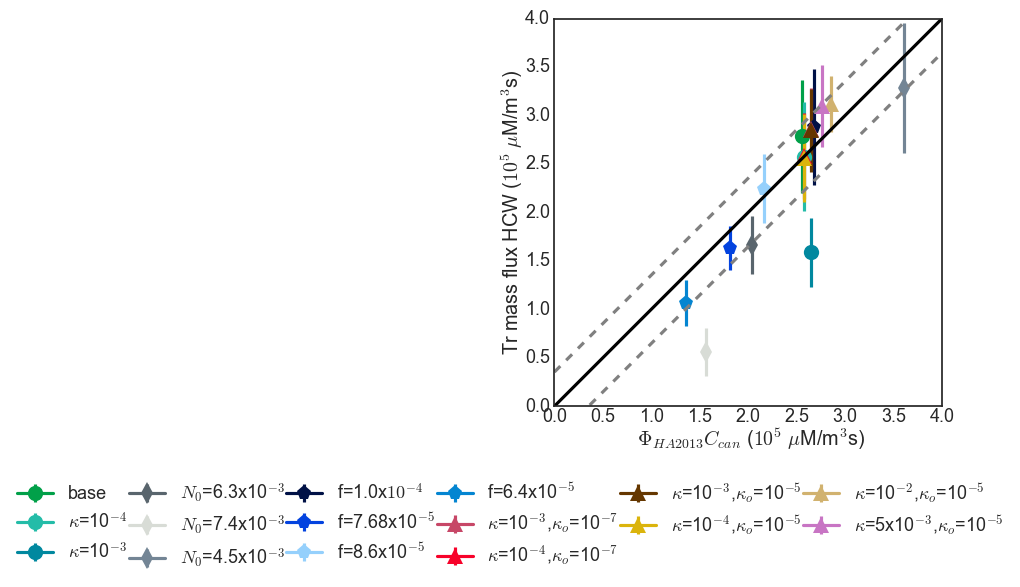

In [18]:
sns.set_context('talk')
f0,ax0 = plt.subplots(1,1,figsize = (5,5)) # 190mm = 7.48 in, 230cm = 9.05in
f1,ax1 = plt.subplots(1,1,figsize = (5,5)) # 190mm = 7.48 in, 230cm = 9.05in
f2,ax2 = plt.subplots(1,1,figsize = (5,5)) # 190mm = 7.48 in, 230cm = 9.05in
f3,ax3 = plt.subplots(1,1,figsize = (5,5)) # 190mm = 7.48 in, 230cm = 9.05in
f4,ax4 = plt.subplots(1,1,figsize = (5,5)) # 190mm = 7.48 in, 230cm = 9.05in
f5,ax5 = plt.subplots(1,1,figsize = (5,5)) # 190mm = 7.48 in, 230cm = 9.05in

t=5 # days

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No above %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*rec.kv) 
    
    
    plt1 = ax0.errorbar((1.93*((Z+Zdif)/Hs))+1.01,rec.maxNabove/rec.N,
                        yerr = rec.stdNabove/rec.N, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    
    rec.Z = Z
    rec.Zdif = Zdif
    
    ax0.set_ylabel('$N/N_0$',labelpad=0.5)
    ax0.set_xlabel(r'$1.93(Z+Z_{dif})/H_s+1.01$',labelpad=0.5)

maxN_array_Kv = np.array([rec.maxNabove/rec.N for rec in records2])
tilt_array_Kv = np.array([(rec.Z+rec.Zdif)/Hs for rec in records2])
x_fit = np.linspace(1.0, 2.7, 50)

mean_sq_err = np.mean(((maxN_array_Kv)-(1.93*tilt_array_Kv+1.01))**2)
upper_bound = ax0.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax0.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for N/No above is %f' %mean_sq_err)

ax0.plot(np.linspace(1.0, 2.7, 50),np.linspace(1.0, 2.7, 50),'k-')
ax0.set_ylim(1,2.7)
ax0.set_xlim(1,2.7)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    
    plt1 = ax1.errorbar((5.37*(Z/Hs)*(TauNo))+1.40,rec.maxN/rec.N,
                        yerr = rec.stdN/rec.N, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    
    rec.Z = Z
    rec.tauNo = TauNo
    
    ax1.set_ylabel('$N/N_0$',labelpad=0.5)
    ax1.set_xlabel(r'$5.37(Z/H_s)(1-log(t)/log(\tau))+1.40$',labelpad=0.5)

maxN_array = np.array([rec.maxN/rec.N for rec in records2])
tilt_array = np.array([(rec.Z/Hs)*rec.tauNo for rec in records2])
x_fit = np.linspace(1, 2.6, 50)

mean_sq_err = np.mean((maxN_array-(5.37*tilt_array+1.40))**2)

upper_bound = ax1.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax1.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for N/No below is %f' %mean_sq_err)

ax1.plot(np.linspace(1, 2.6, 50),np.linspace(1, 2.6, 50),'k-')
ax1.set_ylim(1,2.6)
ax1.set_xlim(1,2.6)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% dTr/dz %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax2.plot(np.linspace(1,6.5, 50),np.linspace(1,6.5, 50),'k-')

for rec,recNoC in zip(records,recordsNoC):
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*rec.kv)
    plt1 = ax2.errorbar(6.80*((Z+Zdif)/Hs)+0.53,rec.maxdTrdz/rec.inidTrdz,
                        yerr = rec.stddTrdz/rec.inidTrdz, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
   
    rec.Z = Z
    rec.Zdif = Zdif
    ax2.set_ylabel('$\delta_zC/\delta_zC_0$',labelpad=0.5)
    ax2.set_xlabel(r'$6.80(Z+Z_{dif})/Hs)+0.53$',labelpad=0.5)

maxN_array = np.array([rec.maxdTrdz/rec.inidTrdz for rec in records2])
tilt_array = np.array([(rec.Z+rec.Zdif)/Hs for rec in records2])
x_fit = np.linspace(1,6.5, 50)

mean_sq_err = np.mean(((maxN_array)-(6.80*tilt_array+0.53))**2)
upper_bound = ax2.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax2.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for dTr/dz above is %f' %mean_sq_err)
ax2.set_ylim(1,7)
ax2.set_xlim(1,7)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Tracer Conc %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec in records:
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    ax3.plot(np.linspace(1,1.4,50),np.linspace(1,1.4,50),'k-')
    Zdif = np.sqrt(t*3600*24*rec.kv)
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    plt1 = ax3.errorbar((0.09*(dTrdz*(Hh+132.0)/2.0)+7.17)/rec.TrSB,rec.maxTr/rec.TrSB,
                        yerr = rec.stdTr/rec.TrSB,
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    rec.Z = Z
    rec.Zdif = Zdif
    rec.dTr = dTrdz
    ax3.set_xlim(1,1.4)
    ax3.set_ylim(1,1.4)
    #ax3.set_title('Max tracer concetration between head nad sh, Dn')
    ax3.set_ylabel('$C_{max}$/$C_{sb}$',labelpad=0.5)
    ax3.set_xlabel(r'$0.012\delta_zC(H_{sb}+H_r)/2+0.99$',labelpad=0.5)

maxN_array = np.array([rec.maxTr/rec.TrSB for rec in records2])
tilt_array = np.array([(0.09*(rec.dTr*(Hh+132.0)/2.0)+7.17)/rec.TrSB for rec in records2])
x_fit = np.linspace(1,1.4, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax3.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax3.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for C/Co is %f' %mean_sq_err)

ax3.set_ylim(1,1.4)
ax3.set_xlim(1,1.4)


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec,recNoC in zip(records,recordsNoC):
    

    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    
    TauNo = 1-(np.log(t*24*3600)/np.log((((Hs-Hh)/2)**2)/rec.kv))
    Napprox = rec.N*((5.38*(Z/Hs)*(TauNo))+1.41)
     
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    
    HA2013=((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    can_eff = rec.HCW-recNoC.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    #Phi = np.mean(np.array([(can_eff[ii]) for ii in range (8,14)]))
      
    plt1 = ax4.errorbar(HA2013*(rec.u*W*Dh(rec.f,L,rec.N)),Phi,
                        yerr=Phi_std,
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    rec.Phi = Phi
    rec.HA2013 = HA2013*(rec.u*W*Dh(rec.f,L,rec.N))

#ax4.set_title('Upwelling flux scaled as HA2013 using Napprox')
ax4.set_ylabel('$\Phi$ (m$^3$s$^{-1}$)  ',labelpad=0.5)
ax4.set_xlabel('$UW_{sb}Dh$ $(0.91\mathcal{F}_w^{3/2}R_L^{1/2}(1-1.2S_E)^3+0.07)$ (m$^3$s$^{-1}$)',labelpad=0.5)
    
maxN_array = np.array([rec.Phi for rec in records3])
tilt_array = np.array([rec.HA2013 for rec in records3])
x_fit = np.linspace(0,50000, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax4.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax4.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for Phi is %f' %mean_sq_err)

ax4.plot(np.linspace(0,50000, 50),np.linspace(0,50000, 50),'k-')
ax4.set_ylim(0,50000)
    
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec,recNoC in zip(records,recordsNoC):    
    
    Z = ((rec.f*rec.u*F(Ro(rec.u,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*rec.kv)
    Napprox=((1.91*((Z+Zdif)/Hs))+0.99)*rec.N
    
    dTrdz = -rec.inidTrdz*(6.8*(((Z+Zdif)/Hs))+0.53)
    
    Capprox=0.09*(dTrdz*(Hh+132.0)/2.0)+7.17
    
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u,rec.f,W))/Ro(rec.u,rec.f,L))**(1/2)))
    HA2013=(rec.u*W*Dh(rec.f,L,rec.N))*((0.91*(F(Ro(rec.u,rec.f,W))**(3/2))*(Ro(rec.u,rec.f,L)**(1/2))*((1-1.21*Se)**3))+0.07)
    
    mass_can_eff = rec.TrMass-recNoC.TrMass
    can_eff = rec.HCW-recNoC.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    phiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,15)]))
    
    plt1 = ax5.errorbar(HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                        (phiTr)/1E5,
                        yerr = phiTr_std/1E5,
                        marker = rec.mstyle,
                        markersize = 11,
                        color = sns.xkcd_rgb[rec.color],
                        label=rec.label)
    rec.PhiTr = (phiTr)/1E5
    rec.PhiTrScale = HA2013*(Capprox)/1E5
     
ax5.set_xlabel(' $\Phi_{HA2013} C_{can}$ ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)
ax5.set_ylabel('Tr mass flux HCW ($10^5$ $\mu$M/m$^3$s)',labelpad=0.5)

maxN_array = np.array([rec.PhiTr for rec in records3])
tilt_array = np.array([rec.PhiTrScale for rec in records3])
x_fit = np.linspace(0,4, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax5.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax5.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for PhiTr/1E5 above is %f' %mean_sq_err)

ax5.set_ylim(0,4)
ax5.plot(np.linspace(0,4, 50),np.linspace(0,4, 50),'k-')

    
ax5.legend(bbox_to_anchor=(1.2,-0.15),ncol=6, columnspacing=0.1)
    
ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)
ax5.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)
ax5.tick_params(axis='y', pad=3)

